In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

## **Loading Dataset**
Rading/Viewing the first 5 rows of the table at a glance

In [134]:
df=pd.read_csv("/content/ADANIPORTS.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


Checking the Total no of rows and column


In [135]:
df.shape

(3322, 15)

Checking all the Features/columns

In [136]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

General information of the table including column names, col datatype and null values

# **EDA**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

Statistical details of numerical columns

In [138]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


Statistical details of non-numerical columns

In [139]:
df.describe(include='object')

,Date,Symbol,Series
count,3322,3322,3322
unique,3322,2,1
top,2021-04-30,ADANIPORTS,EQ
freq,1,2299,3322


# **Data Preprocessing and Cleaning**

Renaming one of the columns

In [140]:
df=df.rename(columns={'%Deliverble':'Deliverble'})

Checking unique values of all the columns

In [141]:
for col in df.columns:
      print(f"unique values for {col}:")
      print(df[col].unique())

unique values for Date:
['2007-11-27' '2007-11-28' '2007-11-29' ... '2021-04-28' '2021-04-29'
 '2021-04-30']
unique values for Symbol:
['MUNDRAPORT' 'ADANIPORTS']
unique values for Series:
['EQ']
unique values for Prev Close:
[440.   962.9  893.9  ... 725.35 730.75 746.25]
unique values for Open:
[770.  984.  909.  ... 733.  753.2 739. ]
unique values for High:
[1050.    990.    914.75 ...  739.65  757.5   759.45]
unique values for Low:
[770.  874.  841.  ... 741.1 743.4 724.5]
unique values for Last:
[959.  885.  887.  ... 743.4 746.4 726.4]
unique values for Close:
[962.9  893.9  884.2  ... 730.75 746.25 730.05]
unique values for VWAP:
[984.72 941.38 888.09 ... 751.02 753.06 743.35]
unique values for Volume:
[27294366  4581338  5124121 ... 11156977 13851910 12600934]
unique values for Turnover:
[2.68771905e+15 4.31276530e+14 4.55065846e+14 ... 8.37910561e+14
 1.04313865e+15 9.36691139e+14]
unique values for Trades:
[    nan  19171.  16176. ... 130847. 153293. 132141.]
unique values f

Checking the null values

In [142]:
df.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


Converting the Date column into data and time format

In [143]:
df['Date'] =pd.to_datetime(df['Date'])

Imputing the Trade column with Mean value

In [144]:
df['Trades'] = df['Trades'].fillna(df['Trades'].mean())

Sorting the data Date wise

In [145]:
df = df.sort_values(by='Date')

In [146]:
df.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


Checking the duplicate value

In [147]:
df.duplicated().sum()

np.int64(0)

Converting numeric columns coercing errors to NaN

In [148]:
for col in df.columns:
  if df[col].dtype != 'object' and col != 'Date':
    df[col] = pd.to_numeric(df[col], errors='coerce')

Checking outlier for all the numerical columns

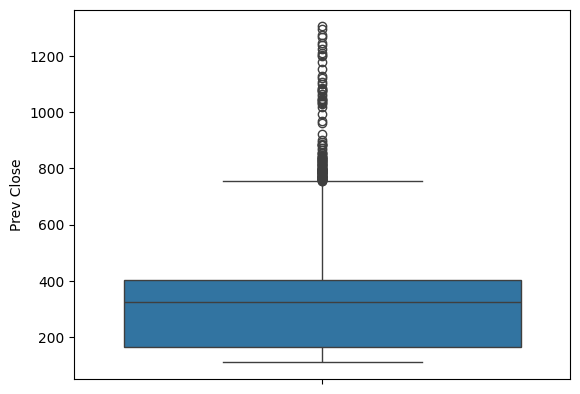

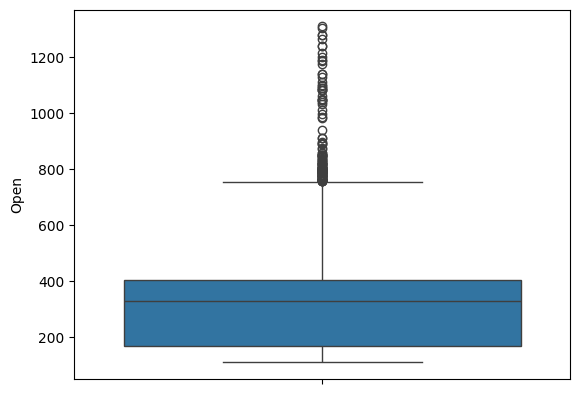

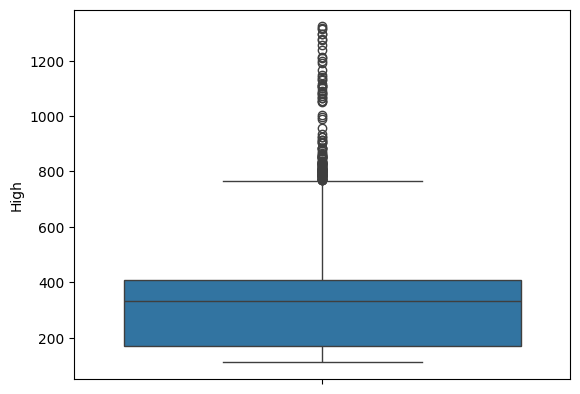

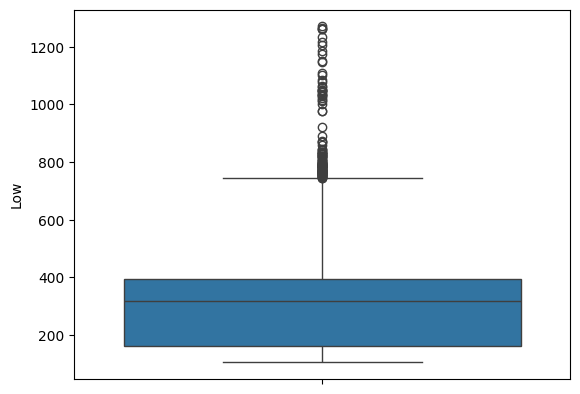

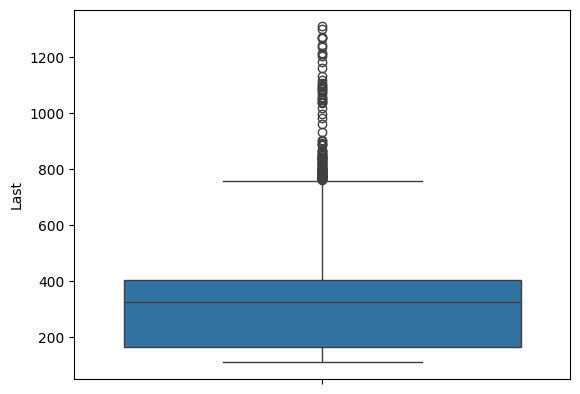

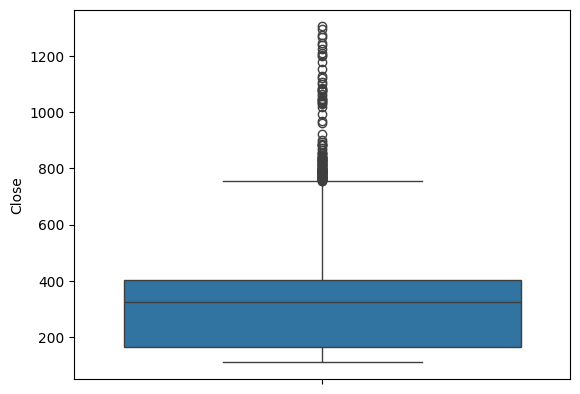

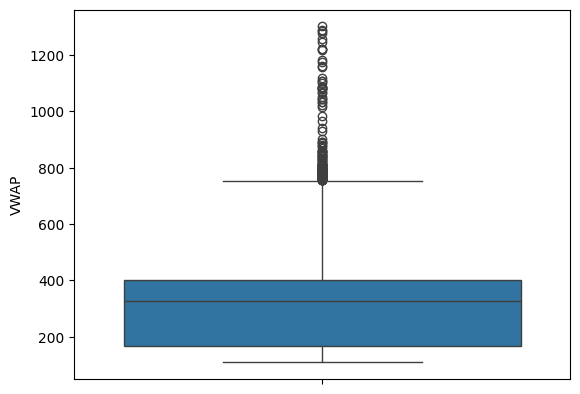

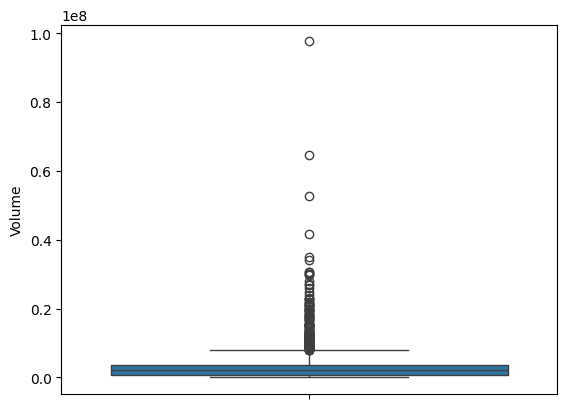

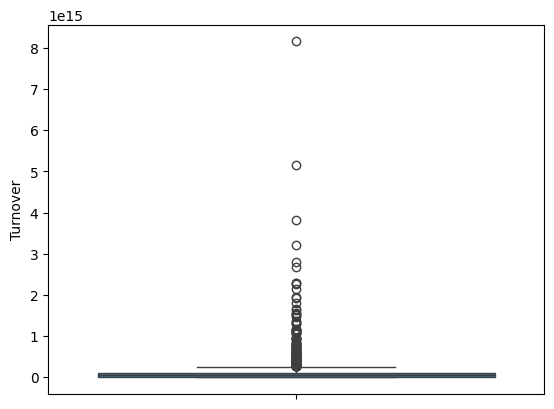

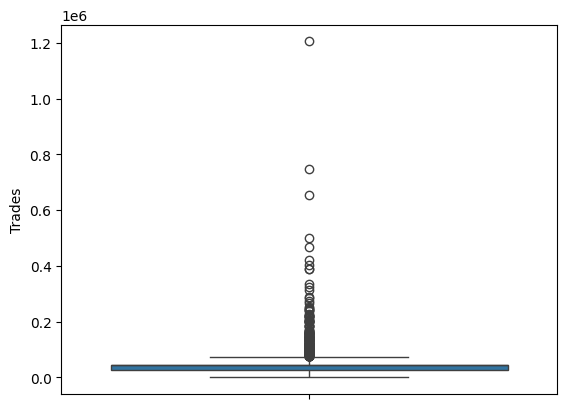

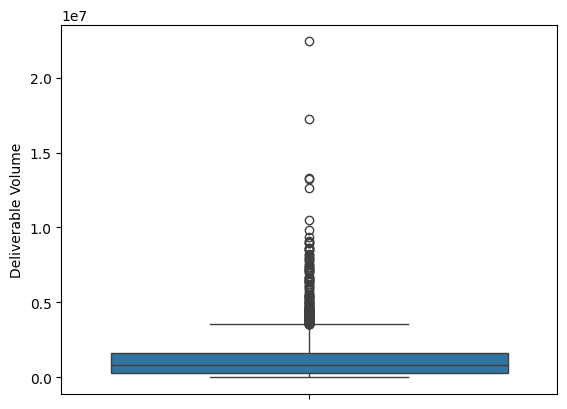

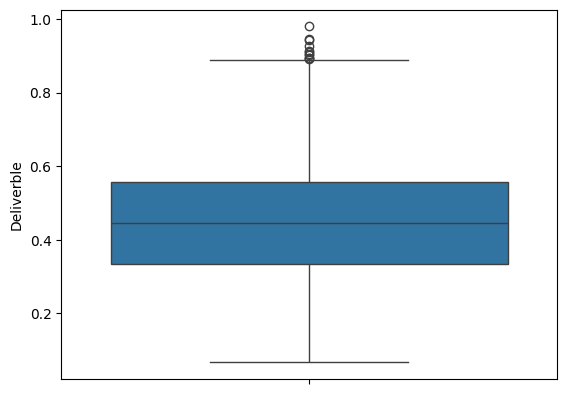

In [149]:
for i in df.columns:
  if df[i].dtype != 'object' and i != 'Date':
    sns.boxplot(df[i])
    # plt.xlabel(i)
    plt.show()

Removing outlier

In [150]:
col_list = list(df.columns)
for i in col_list:
  if df[i].dtype != 'object' and i != 'Date':
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3+(1.5*IQR)
    LL = Q1- (1.5*IQR)
    df= df[(df[i]>=LL) & (df[i]<=UL)]

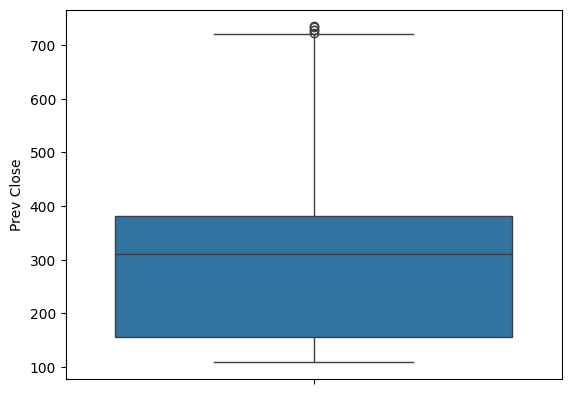

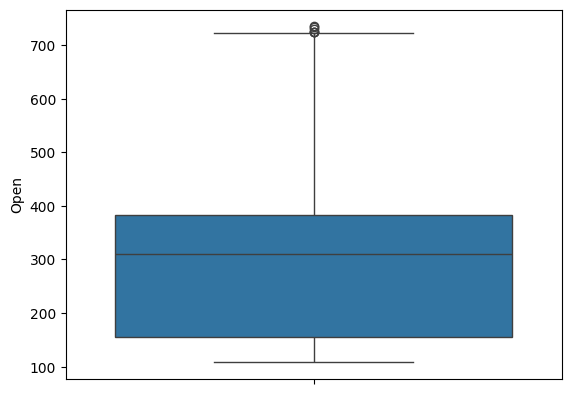

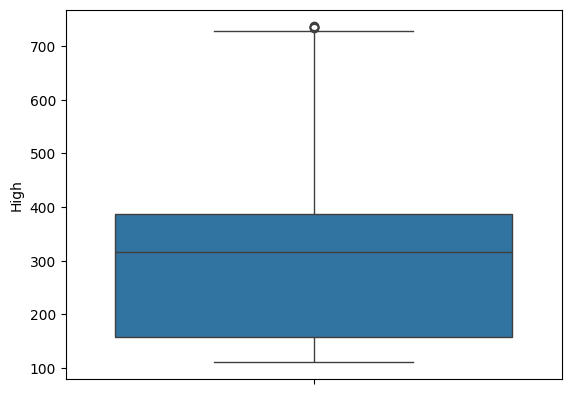

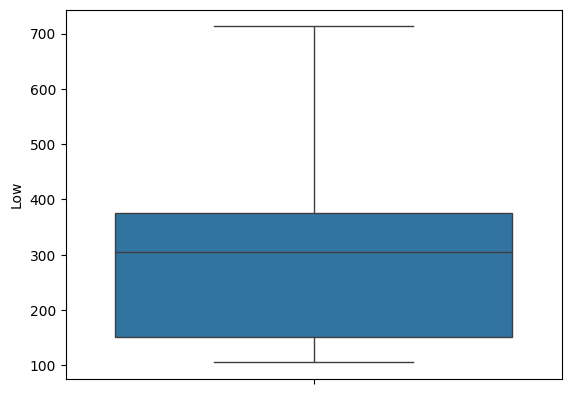

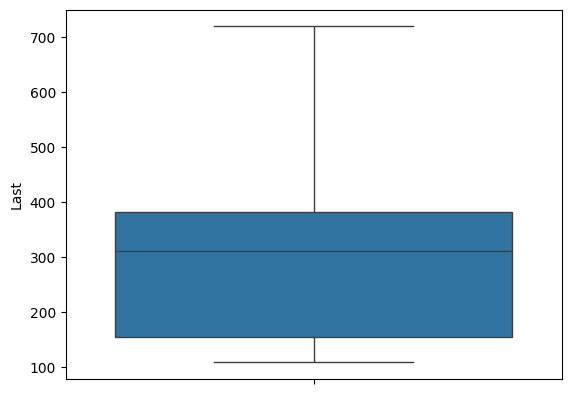

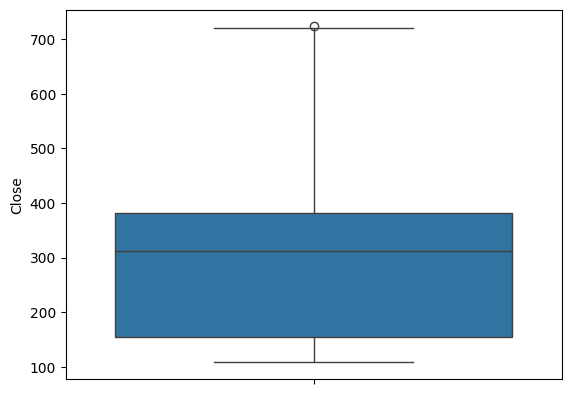

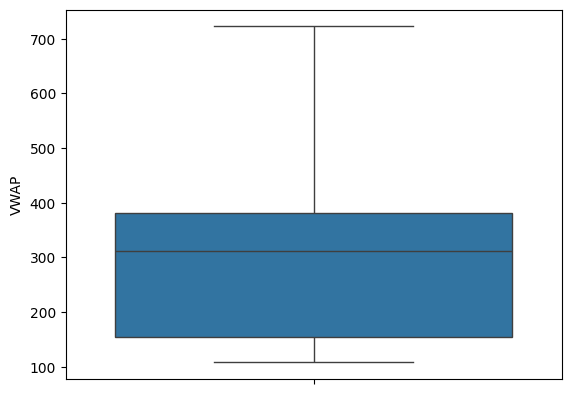

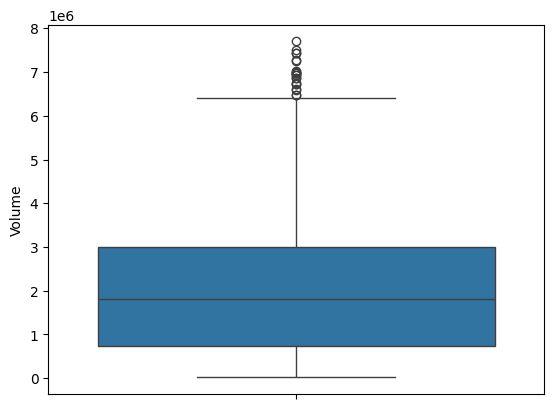

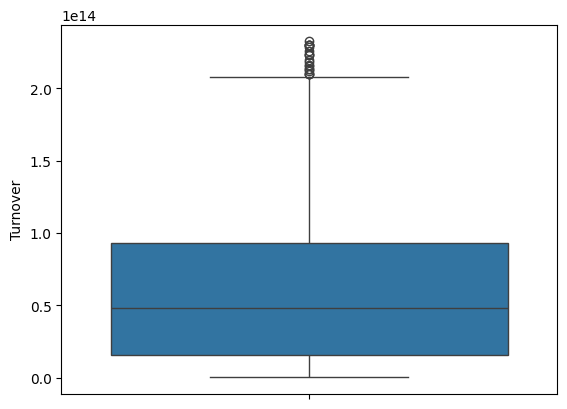

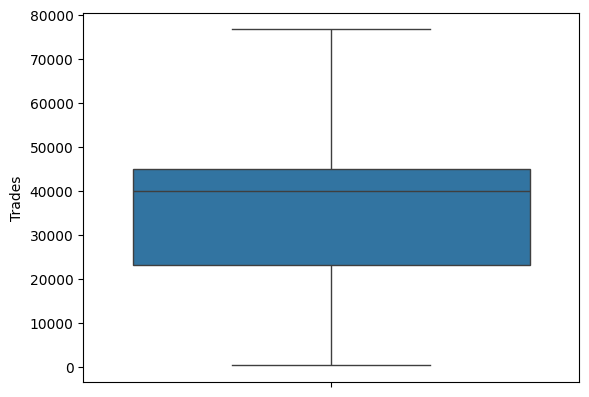

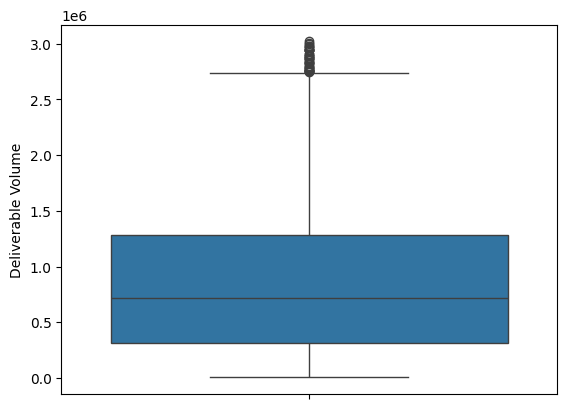

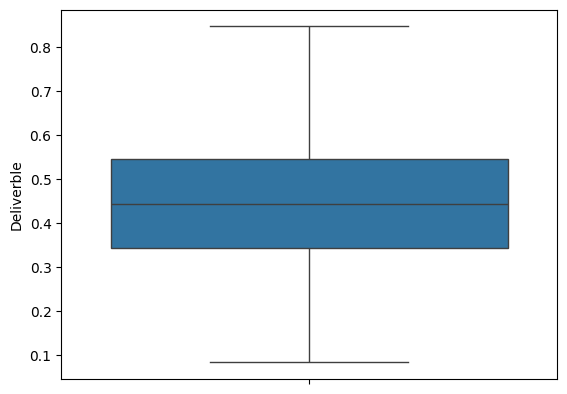

In [151]:
for i in df.columns:
  if df[i].dtype != 'object' and i != 'Date':
    sns.boxplot(df[i])
    # plt.xlabel(i)
    plt.show()

After removing outlier again checking and removing the null values

In [152]:
df.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


# **Visualizations**

Daily Trading Volume Distribution

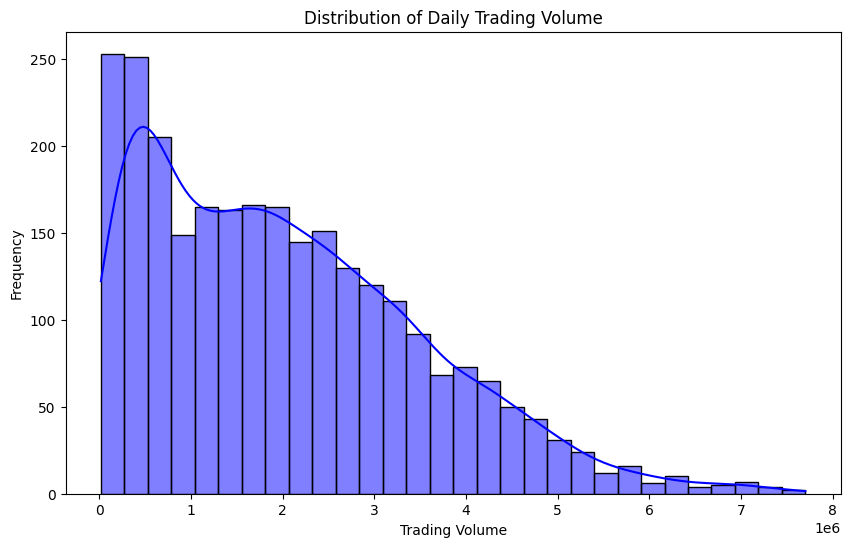

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()

Percentage of Deliverable Volume Across Stocks

/tmp/ipython-input-154-3417853392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deliverable.values, y=deliverable.index, palette='coolwarm')


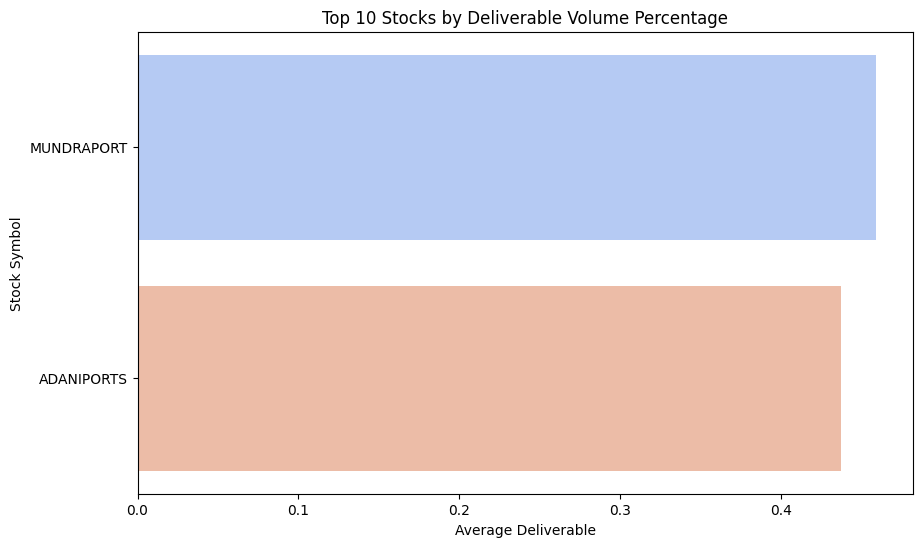

In [154]:
deliverable = df.groupby('Symbol')['Deliverble'].mean().sort_values(ascending=False).head(50)
plt.figure(figsize=(10, 6))
sns.barplot(x=deliverable.values, y=deliverable.index, palette='coolwarm')
plt.title('Top 10 Stocks by Deliverable Volume Percentage')
plt.xlabel('Average Deliverable')
plt.ylabel('Stock Symbol')
plt.show()

*Mundra Port and Adani Ports stand out with high deliverable percentages, indicating stronger investor confidence in these stocks, likely driven by their fundamentals or market position.*

**Technical Analysis: Bollinger Bands to assess price deviation from a moving average for ADANIPORTS.**

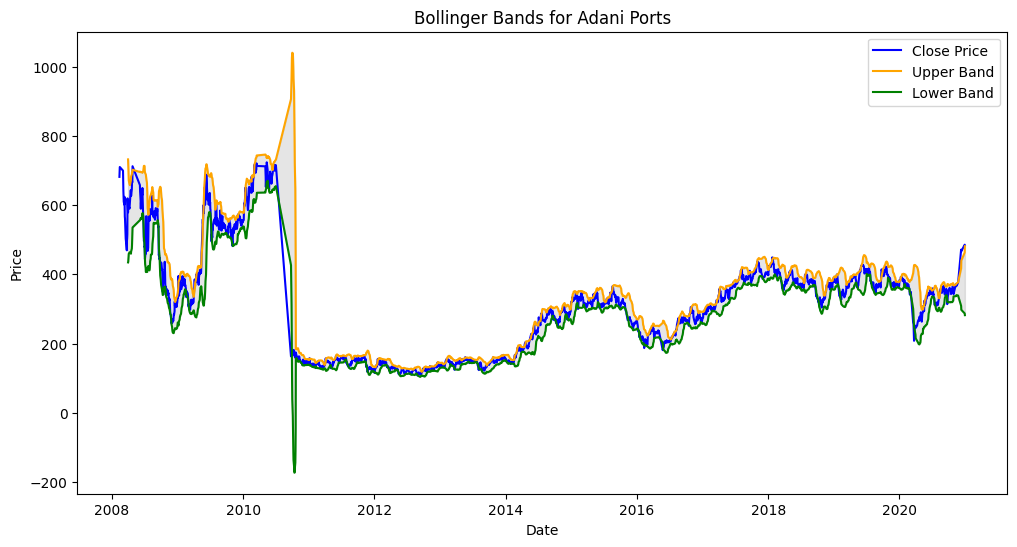

In [155]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['MA_20'] + 2 * df['Close'].rolling(20).std()
df['Lower_Band'] = df['MA_20'] - 2 * df['Close'].rolling(20).std()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', color='orange')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', color='green')
plt.fill_between(df['Date'], df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands for Adani Ports')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Correlation Heatmap for Numerical Columns

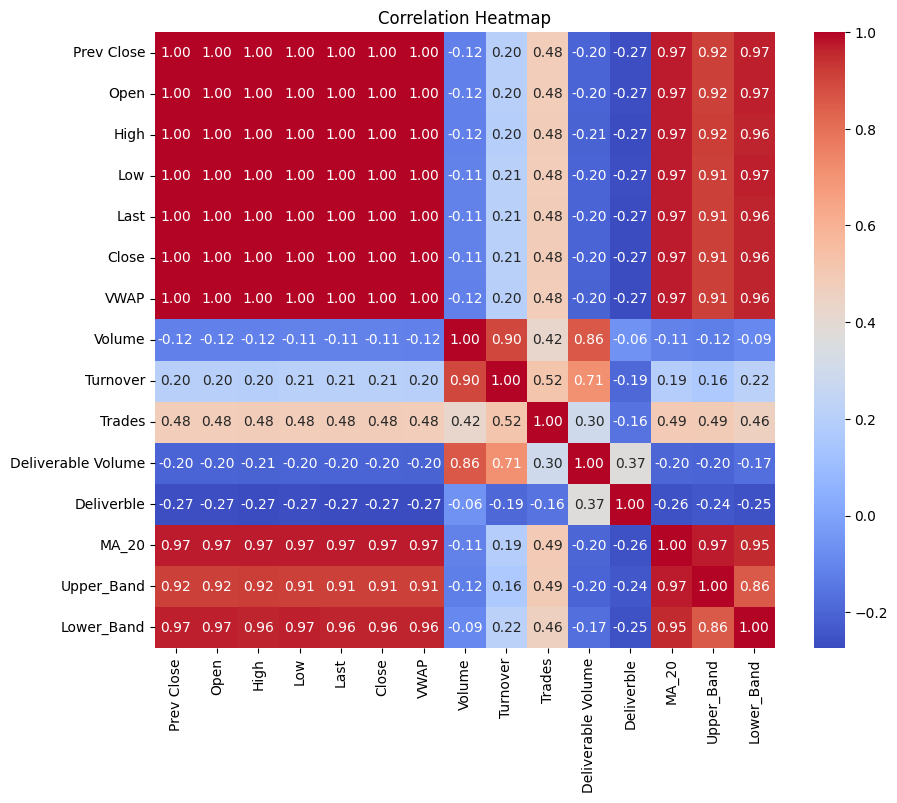

In [156]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# **Q-1)Analyze the indicators in the dataset that best explain the volatility and unpredictable nature of the stocks in the last decade**

Based on the available columns in my DataFrame (df), the following indicators can explain the volatility and unpredictable nature of the stock:

Volume: Higher trading volume often indicates increased market activity. Unpredictable events can also lead to spikes in volume.

Trades: Like volume the number of trades reflects market participation.  and associated with increased price volatility.

Deliverble: The deliverable quantity represents the actual shares that change ownership while fluctuations in deliverable percentage might suggest changes in market sentiment and contribute to unpredictability.

Spread (High - Low):The difference between the daily High and Low prices (which can be derived from the 'High' and 'Low' columns) is a direct measure of the price spread within a single day, reflecting volatility. Larger spreads indicate higher volatility.

Analyzing these indicators over time can provide insights into periods of high volatility and unpredictability in the stock

Identifying the stock with the highest trading volume

In [157]:
highest_volume = df.loc[df['Volume'].idxmax()]
print(f"Stock with the highest trading volume:\n{highest_volume}")

Stock with the highest trading volume:
Date                  2014-04-23 00:00:00
Symbol                         ADANIPORTS
Series                                 EQ
Prev Close                          204.8
Open                                208.0
High                               213.05
Low                                203.35
Last                                205.7
Close                              204.45
VWAP                               207.84
Volume                            7702502
Turnover                160089467835000.0
Trades                            60289.0
Deliverable Volume                2553239
Deliverble                         0.3315
MA_20                               186.4
Upper_Band                     204.525905
Lower_Band                     168.274095
Name: 1588, dtype: object


Analyze the Closing Price Trend for Adaniport stock

In [158]:
Adanipots_data = df[df['Symbol'] == 'ADANIPORTS'].copy()
Mundraport_data = df[df['Symbol'] == 'MUNDRAPORTS'].copy()

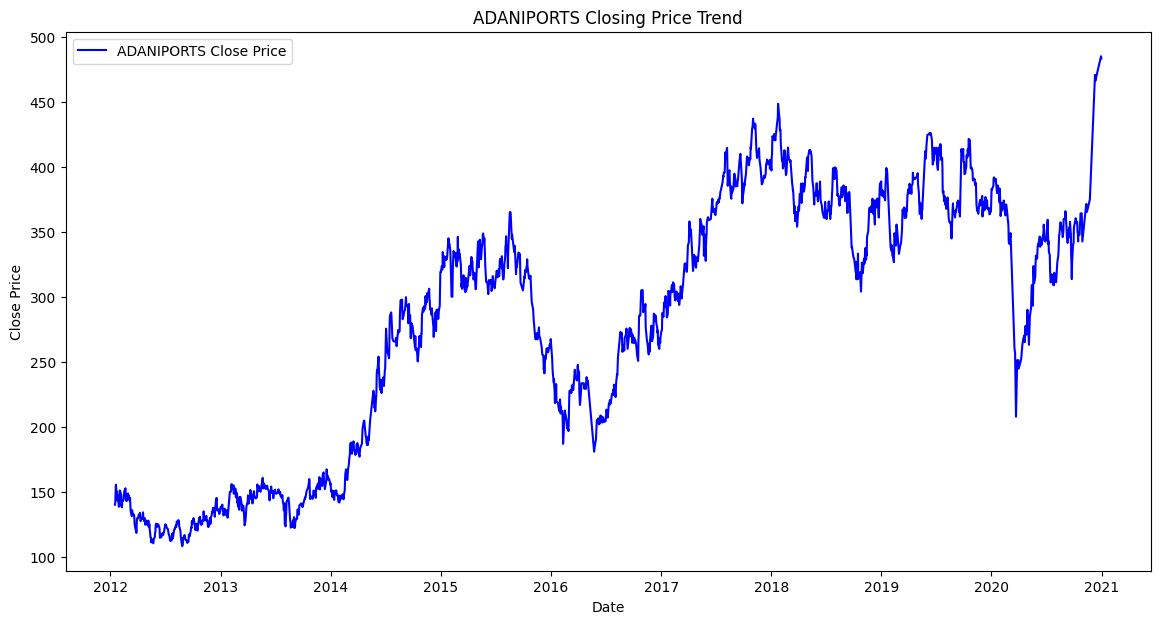

In [159]:
Adanipots_data.set_index('Date', inplace=True)
Mundraport_data.set_index('Date', inplace=True)
# Plotting the closing price trend for both
plt.figure(figsize=(14, 7))
plt.plot(Adanipots_data.index, Adanipots_data['Close'], label='ADANIPORTS Close Price', color='blue')
if not Mundraport_data.empty:
 plt.plot1(Mundraport_data.index, Mundraport_data['Close'], label='MUNDRAPORTS Close Price', color='green')
plt.legend()
plt.title('ADANIPORTS Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

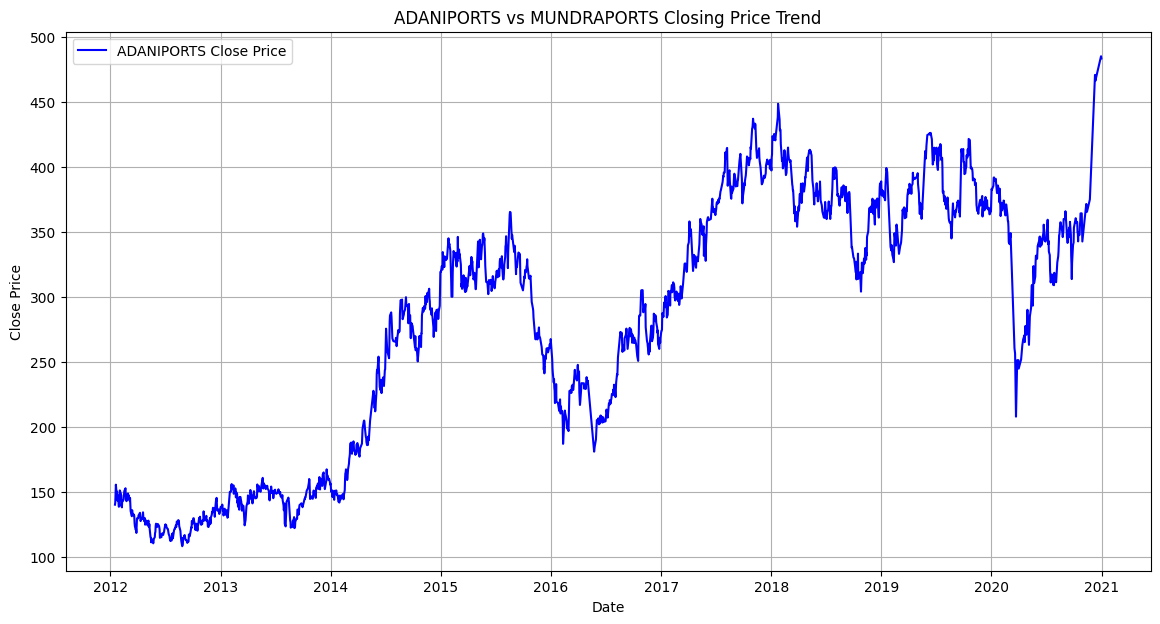

In [160]:
Adanipots_data = df[df['Symbol'] == 'ADANIPORTS'].copy()
Mundraport_data = df[df['Symbol'] == 'MUNDRAPORTS'].copy()
plt.figure(figsize=(14, 7))
if not Adanipots_data.empty:
    plt.plot(Adanipots_data['Date'], Adanipots_data['Close'], label='ADANIPORTS Close Price', color='blue')
if not Mundraport_data.empty:
    plt.plot(Mundraport_data['Date'], Mundraport_data['Close'], label='MUNDRAPORTS Close Price', color='green')
plt.legend()
plt.title('ADANIPORTS vs MUNDRAPORTS Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


Description of closing price trend

In [161]:
Adanipots_data['Close'].describe()

,Close
count,1860.000000
mean,275.678172
std,99.596958
min,108.000000
25%,156.337500
50%,300.175000
75%,365.500000
max,485.400000


Identifying the Stock with the Highest Average Closing Price

In [162]:
Avg_closingprice = df.groupby('Symbol')['Close'].mean().sort_values(ascending=False)
Avg_closingprice

,Close
Symbol,
MUNDRAPORT,374.937228
ADANIPORTS,275.678172


Finding the Most Volatile Stock

In [163]:
df['Volatility'] = df['High'] - df['Low']
Volatile_stock = df.groupby('Symbol')['Volatility'].mean().sort_values(ascending=False)
Volatile_stock

,Volatility
Symbol,
MUNDRAPORT,19.063196
ADANIPORTS,8.460753


Correlation Between Trading Volume and Closing Price

In [164]:
correlation = df['Volume'].corr(df['Close'])
correlation

np.float64(-0.11304065207676901)

# **Q2-)Choose promising stock based on your analysis for your portfolio**
**Inferences:**

Stock with the Highest Trading Volume:Adani Ports recorded the highest trading volume with a volume of 65,83,611 shares

Stock with the Highest Average Closing Price:
MUNDRAPORT had the highest average closing price at 374.65 over the dataset period.

Most Volatile Stock:
MUNDRAPORT emerged as the most volatile stock with a volatility value of 18.65.This indicates significant price fluctuations over time

Correlation Between Trading Volume and Closing Price:
The correlation between Trading Volume and Closing Price is -0.11 indicating a very weak negetive relationship means volume does not impact the closing price at all.

**This analysis highlights Mundraport's closing price dominance and volatility, whereas Adaniport performed with highest trading volume.**


# **Q3-)Build a dashboard where you can analyze the performance of the stocks**

Stock Performance Dashboard
This section provides a visual overview of key stock performance indicators based on the analyzed data.

1. Overall Closing Price Trend (if multiple symbols are present, show ADANIPORTS as primary)

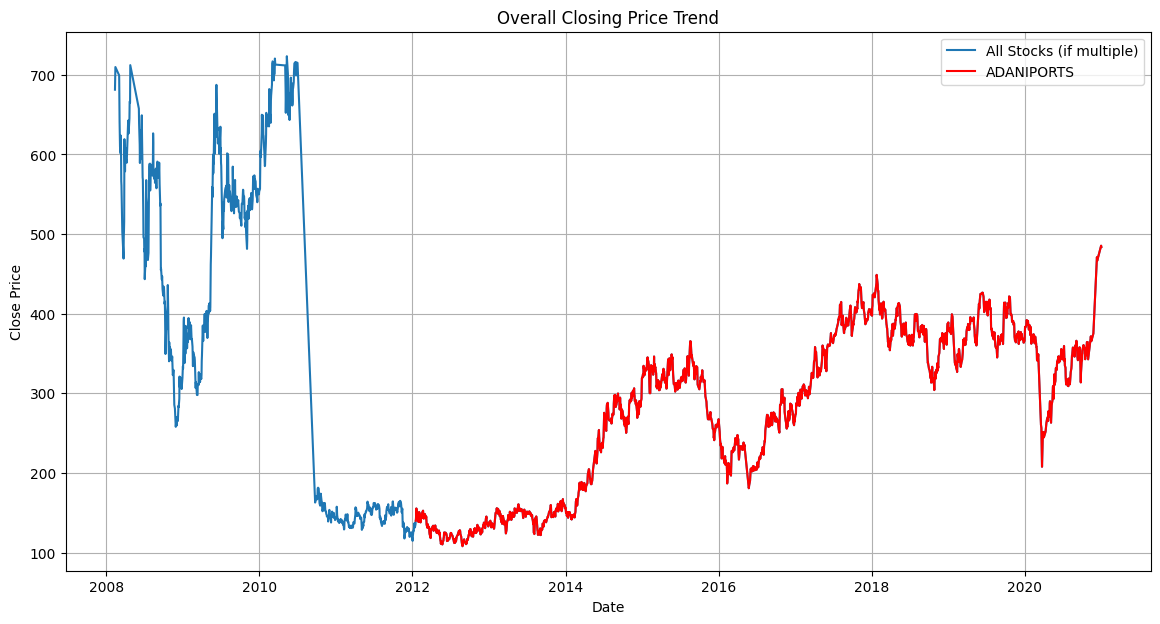

In [165]:
# Assuming 'df' has been processed and 'Date' is not the index yet for this plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Close', label='All Stocks (if multiple)')
# Optionally, highlight ADANIPORTS if it's the focus
sns.lineplot(data=df[df['Symbol'] == 'ADANIPORTS'], x='Date', y='Close', label='ADANIPORTS', color='red')
plt.title('Overall Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


2. Distribution of Daily Trading Volume

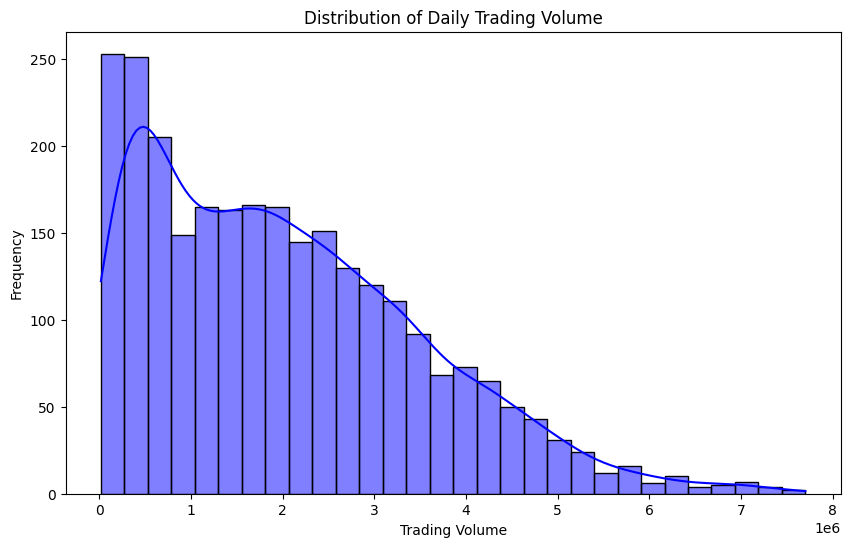

In [166]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()


3. Average Deliverable Percentage by Stock Symbol

/tmp/ipython-input-167-759947192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deliverable.values, y=deliverable.index, palette='coolwarm')


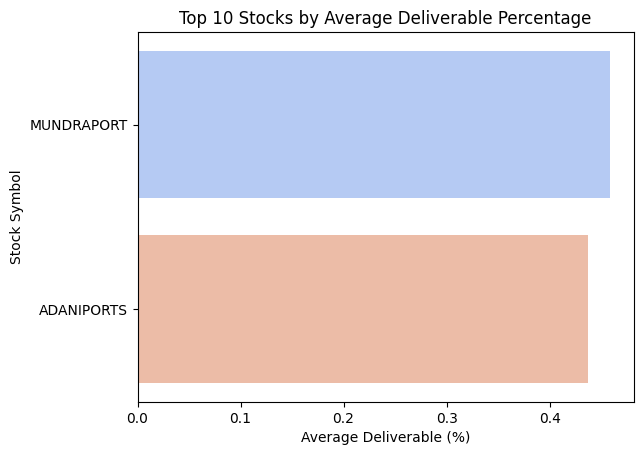

In [167]:
if 'Symbol' in df.columns and 'Deliverble' in df.columns:
    deliverable = df.groupby('Symbol')['Deliverble'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=deliverable.values, y=deliverable.index, palette='coolwarm')
    plt.title('Top 10 Stocks by Average Deliverable Percentage')
    plt.xlabel('Average Deliverable (%)')
    plt.ylabel('Stock Symbol')
    plt.show()
else:
    print("Skipping Average Deliverable plot: 'Symbol' or 'Deliverble' column not found.")

4. Daily Volatility (High - Low) Trend

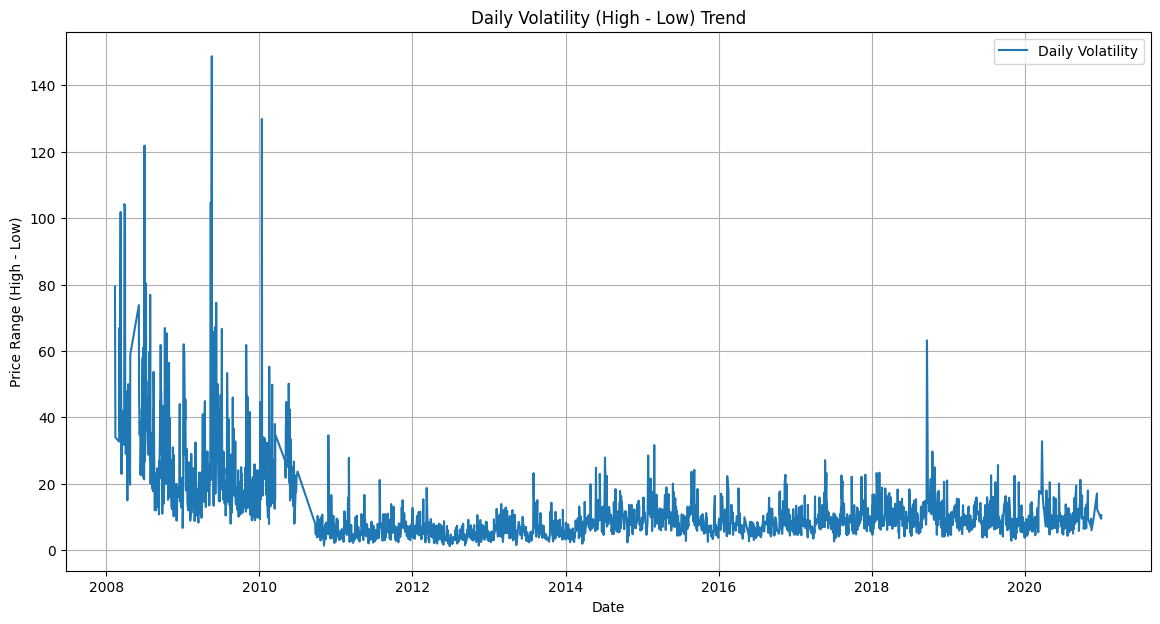

In [168]:
if 'Volatility' not in df.columns:
    df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Volatility', label='Daily Volatility')
plt.title('Daily Volatility (High - Low) Trend')
plt.xlabel('Date')
plt.ylabel('Price Range (High - Low)')
plt.grid(True)
plt.show()


### **Q4-)Feature engineer and build machine learning solutions for the business Requirements**

Feature Engineering for Machine Learning

In [169]:
df_single_stock = df[df['Symbol'] == 'ADANIPORTS'].copy()
df_single_stock = df_single_stock.sort_values(by='Date')
df_single_stock.set_index('Date', inplace=True)

In [170]:
# 1. Lagged Features
df_single_stock['Close_lag_1d'] = df_single_stock['Close'].shift(1)
df_single_stock['Volume_lag_1d'] = df_single_stock['Volume'].shift(1)
df_single_stock['Volatility_lag_1d'] = df_single_stock['Volatility'].shift(1)


Adding few more lags as desired

In [171]:
df_single_stock['Close_lag_5d'] = df_single_stock['Close'].shift(5)
df_single_stock['Volume_lag_5d'] = df_single_stock['Volume'].shift(5)

Rolling Window Statistics

In [172]:
df_single_stock['MA_5'] = df_single_stock['Close'].rolling(window=5).mean()
df_single_stock['MA_20'] = df_single_stock['Close'].rolling(window=20).mean() # Already calculated, recalculating to be sure
df_single_stock['Volume_MA_5'] = df_single_stock['Volume'].rolling(window=5).mean()
df_single_stock['Rolling_Std_20'] = df_single_stock['Close'].rolling(window=20).std()

Using Technical Indicator through ta library

In [173]:
!pip install ta

In [174]:
import ta

Adding technical analysis features

In [175]:
df_single_stock = ta.add_all_ta_features(
    df_single_stock, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
/usr/local/lib/python3.11/dist-packages/ta/wrapper.py:531: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{colprefix}others_dlr"] = DailyLogReturnIndicator(
/usr/local/lib/python3.11/dist-packages/ta/wrapper.py:536: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

Adding Time-Based Features

In [176]:
if not isinstance(df_single_stock.index, pd.DatetimeIndex):
    df_single_stock.index = pd.to_datetime(df_single_stock.index)

df_single_stock['Day_of_Week'] = df_single_stock.index.dayofweek
df_single_stock['Month'] = df_single_stock.index.month
df_single_stock['Year'] = df_single_stock.index.year

/tmp/ipython-input-176-886952064.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_single_stock['Day_of_Week'] = df_single_stock.index.dayofweek
/tmp/ipython-input-176-886952064.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_single_stock['Month'] = df_single_stock.index.month
/tmp/ipython-input-176-886952064.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

Converting categorical time features to dummy variables

In [177]:
df_single_stock = pd.get_dummies(df_single_stock, columns=['Day_of_Week', 'Month', 'Year'], drop_first=True)

Preparing Data for Machine Learning

In [178]:
# Define Target Variable (e.g., Next Day's Closing Price)
df_single_stock['Target_Close'] = df_single_stock['Close'].shift(-1)

In [179]:
df_single_stock.dropna(subset=['Target_Close'], inplace=True)


In [180]:
df_single_stock.isna().sum().sum()

np.int64(59)

In [181]:
df_single_stock.dropna(inplace=True)

Define Features (X) and Target (y)
Target column is Target_Close..
Both Symbol and Close features need to be excluded from X

In [182]:
features = df_single_stock.drop(['Target_Close', 'Close', 'Symbol'], axis=1, errors='ignore')
target = df_single_stock['Target_Close']


 Selecting only numeric columns for training

In [183]:
features = features.select_dtypes(include=np.number)
print(features.columns.tolist())

['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', 'Deliverble', 'MA_20', 'Upper_Band', 'Lower_Band', 'Volatility', 'Close_lag_1d', 'Volume_lag_1d', 'Volatility_lag_1d', 'Close_lag_5d', 'Volume_lag_5d', 'MA_5', 'Volume_MA_5', 'Rolling_Std_20', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi', 'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp', 'volatility_kchi', 'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 't

After applying Technical indicator the no. of features has been increased to 109

Splitting of train data and test data

In [184]:
train_size = int(len(df_single_stock) * 0.8)
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

Shape of both the training and testing data

In [185]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1472, 109) (368, 109)
(1472,) (368,)


Initializing and training a Random Forest Regressor as RF is considered for feature scaling and non linear relationship

In [186]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
# Make Predictions on the Test Set
y_pred = rf_model.predict(X_test)
y_pred

array([373.8085, 336.7965, 328.566 , 340.0565, 325.605 , 327.108 ,
       324.0605, 322.5605, 347.1985, 338.559 , 349.3685, 361.662 ,
       360.9035, 329.0685, 339.9655, 342.726 , 344.8025, 350.632 ,
       365.6465, 365.457 , 365.838 , 363.965 , 368.083 , 367.1735,
       366.143 , 364.2725, 367.529 , 368.257 , 379.088 , 382.4435,
       379.088 , 382.0075, 380.4565, 385.9885, 380.572 , 381.239 ,
       384.984 , 379.417 , 384.558 , 385.73  , 395.4755, 392.187 ,
       393.1105, 393.4275, 393.4895, 391.3275, 391.5715, 395.281 ,
       384.198 , 376.728 , 373.051 , 372.7815, 367.364 , 374.0675,
       368.2995, 369.9485, 368.    , 367.003 , 365.527 , 405.2485,
       403.731 , 410.9415, 426.459 , 428.712 , 431.005 , 430.642 ,
       432.533 , 431.235 , 430.304 , 429.117 , 426.5155, 399.9145,
       406.472 , 405.515 , 408.9565, 409.0595, 410.342 , 410.146 ,
       411.158 , 410.708 , 403.5655, 393.913 , 405.3645, 406.4275,
       409.4905, 412.397 , 407.418 , 418.626 , 417.621 , 410.3

Evaluation of the model

Calculating R2 score of the model

In [187]:
from sklearn.metrics import *
r2_score(y_test,y_pred)

0.9081530482273867

RMSE

In [188]:
# Evaluate using Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Squared Error (RMSE) on Test Set: {rmse}")


Root Mean Squared Error (RMSE) on Test Set: 11.595809596005806


Comparing RMSE to the range of the target variable

In [189]:
print(f"Range of Target Variable (Close Price) in Test Set: {y_test.min():.2f} to {y_test.max():.2f}")

Range of Target Variable (Close Price) in Test Set: 207.80 to 485.40


Visualize Actual vs. Predicted Prices

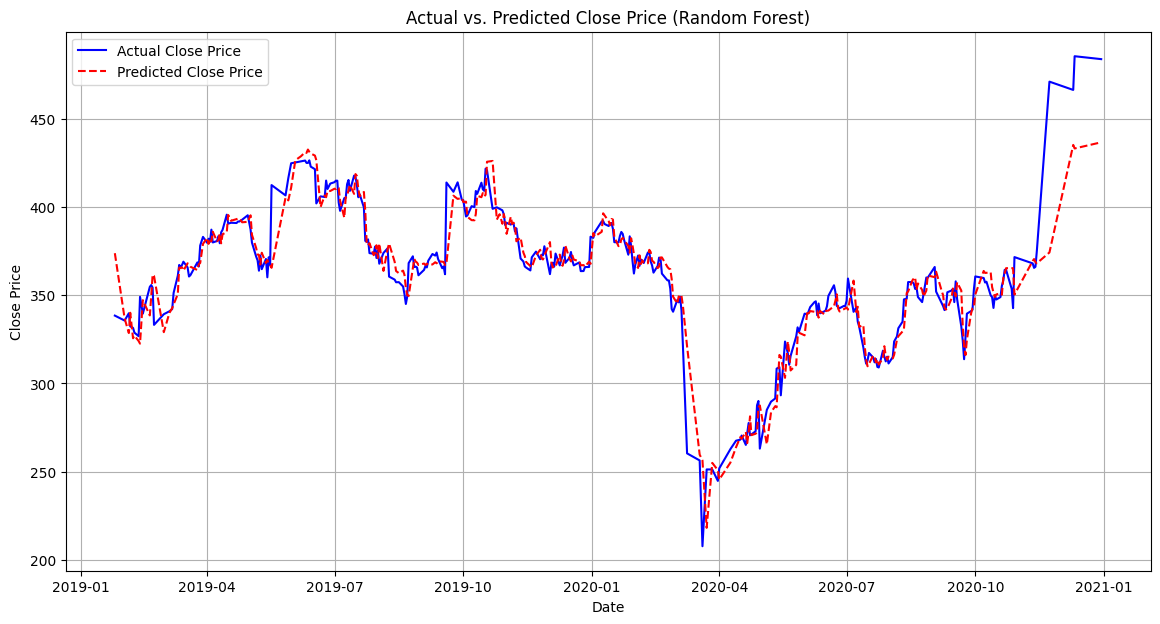

In [190]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance (for tree-based models)

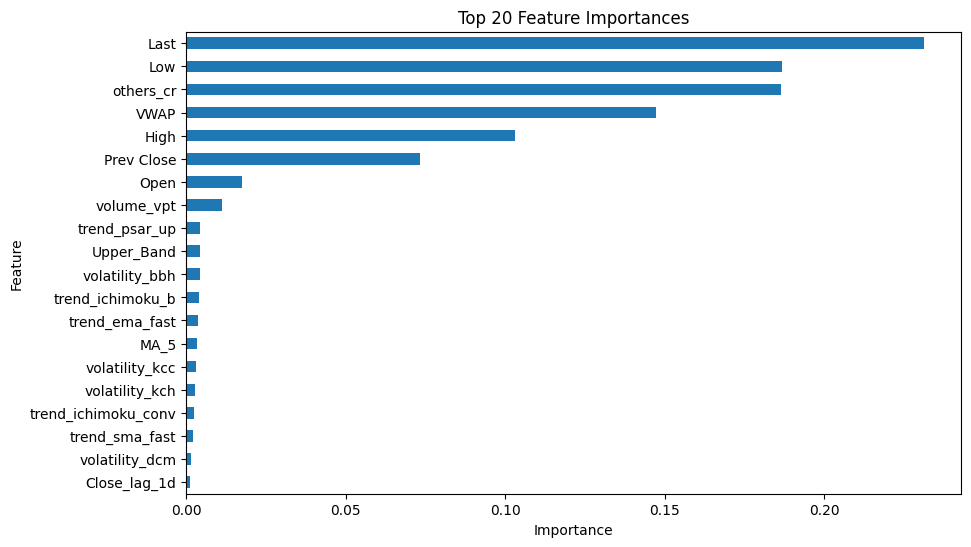

In [191]:
if hasattr(rf_model, 'feature_importances_'):
    feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    # top 20 features
    feature_importances.head(20).plot(kind='barh')
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    # Show the most important features at the top
    plt.gca().invert_yaxis()
    plt.show()
